# Looking Up Places with OSM

Many geocoding tools provide a coordinate for a given place, but is often useful to get the actual geometry (and not just bounding box!) for a place. This notebooks walks through examples of retrieving this data using the Nominatum API (https://nominatim.org/release-docs/latest/api/Lookup/) through OSMNX.

In [1]:
import contextily as cx
import geopandas as gpd
import matplotlib.pyplot as plt
import osmnx as ox

/tmp/ipykernel_557/3367584540.py:2: DeprecationWarning: Shapely 2.0 is installed, but because PyGEOS is also installed, GeoPandas still uses PyGEOS by default. However, starting with version 0.14, the default will switch to Shapely. To force to use Shapely 2.0 now, you can either uninstall PyGEOS or set the environment variable USE_PYGEOS=0. You can do this before starting the Python process, or in your code before importing geopandas:

import os
os.environ['USE_PYGEOS'] = '0'
import geopandas

In the next release, GeoPandas will switch to using Shapely by default, even if PyGEOS is installed. If you only have PyGEOS installed to get speed-ups, this switch should be smooth. However, if you are using PyGEOS directly (calling PyGEOS functions on geometries from GeoPandas), this will then stop working and you are encouraged to migrate from PyGEOS to Shapely 2.0 (https://shapely.readthedocs.io/en/latest/migration_pygeos.html).
  import geopandas as gpd


Let's demonstrate the functionality with a single query:

In [2]:
query_text = "Detroit, MI, USA"

The results give us lots of information about the place including the bounding box and the actual geometry:

In [3]:
res = ox.geocode_to_gdf(query_text)
res

,geometry,bbox_north,bbox_south,bbox_east,bbox_west,place_id,osm_type,osm_id,lat,lon,class,type,place_rank,importance,addresstype,name,display_name
0,"POLYGON ((-83.28796 42.44268, -83.28785 42.442...",42.450396,42.255192,-82.910439,-83.287959,343896903,relation,134591,42.331551,-83.04664,boundary,administrative,16,0.723477,city,Detroit,"Detroit, Wayne County, Michigan, United States"


We can also quickly make an interactive map using the geopandas explore function:

In [4]:
res.explore()

Let's test the functionality with a few queries:

In [5]:
queries = [
    "Chicago, IL, USA", # a city
    "Cook County, IL, USA", # a county
    "Illinois, USA", # a state
    "United States", # a country
    "61801, Urbana" # a zip code, seems to need "Urbana" to work
]

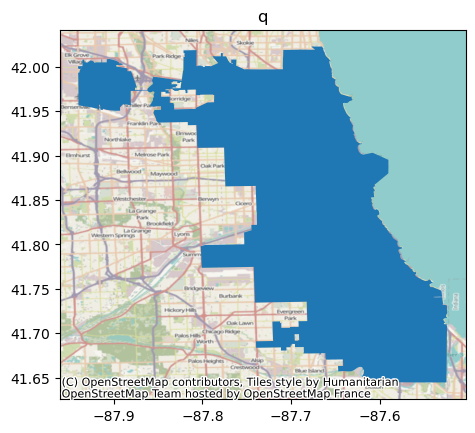

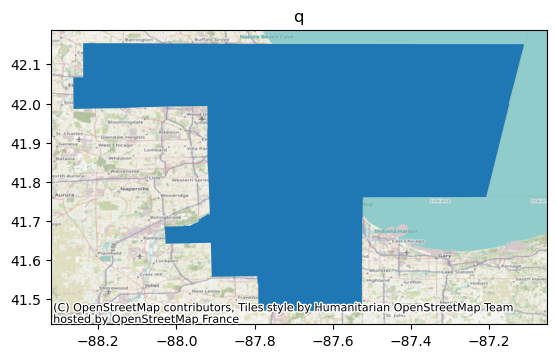

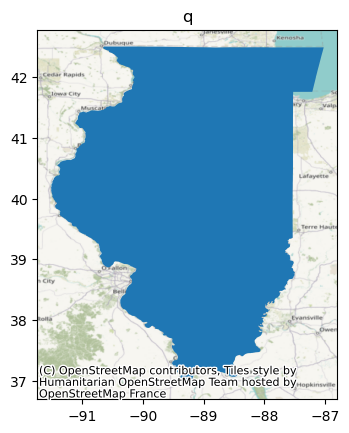

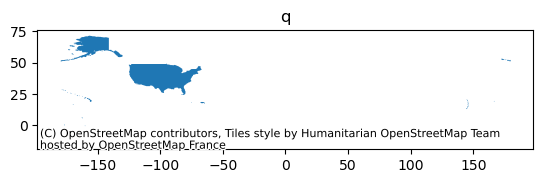

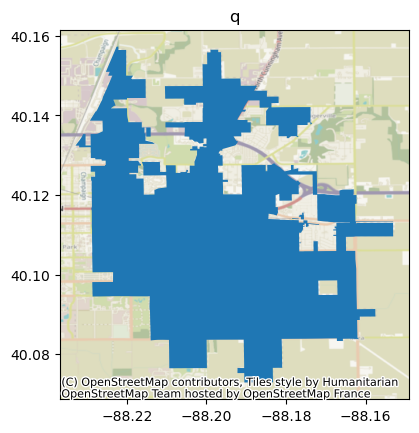

In [6]:
for q in queries:
    tmp = ox.geocode_to_gdf(q)
    ax = tmp.plot()
    cx.add_basemap(ax=ax, crs=tmp.crs.to_string())
    ax.set_title(q)
    plt.show()